# Chi-Square Test

Name: Arthur Pontes Nader


##### We have to compare the theoretical with the observed

We observed a sequence of samples of a random variable Y: $Y_1, Y_2, ..., Y_n$. We suppose this data is i.i.d and comes from a theoretical distribution $F(y)$, that can be for example Bin(20,0,1), Poisson(5), exp(10), N(0,1), and so on. The Chi-Square test is a way to verify if the samples are random variable i.i.d of this theoreical model, whatever it may be. This test has 2 main advantages: can be used with both continuous and discrete distributions and knows how to handle with quantities estimated from the data.

## Libraries

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math
import pandas as pd

from scipy.special import comb
from scipy.stats import chi2, poisson, chisquare, kstest

For a better understand of the test, let's divide it into a sequence of 3 steps.

## Step 1

First of all, we have to partition the possible values of Y in N categories. For example:

- $Bin(20,0.1) : Y = 0, Y = 1, Y = 2, Y = 3, Y >= 4.$

- $Poisson(5) : Y = 0, Y = 1, Y = 2, ..., Y = 10, Y >= 11.$

- $exp(10) : [0,0.05), [0.05,0.1), [0.1,0.2), [0.4, ∞) $

- $N(0,1) :  (−∞, −2), [−2, −1), [−1, 0), [0, 1), [1, 2), (2, ∞)$



## Step 2

For each k category, calculate the number $N_k$ of elements of $Y_1, Y_2, ..., Y_n$ that fall in the k category. This is the observed frequency. We also have to calculate the expected number of observations that should fall into this category.

$$E_k = n \cdot P(Y \in k_{category})$$

For example, if the theoretical model is a Bin(20,0.1), we have a sample of size n = 53 and the category is Y = 0:
$$E_k = 53 \cdot P(Y = 0)$$
$$E_k = 53 \cdot (1-0.1)^{20}$$
$$E_k = 6.44$$

## Step 3

$E_k$ is the expected value if the theoretical model is the true model. We have to compare the observed frequencies $N_k$ with the expected frequencies $E_k$. If they are very different, it is evidence that the theoretical model is not close to reality. Otherwise, this is evidence that the model generates values similar to those observed. But this does not imply that the observed data actually follow the theoretical model. (No one believes that reality follows a perfect mathematical formula. We just need a formula that is a good approximation of reality)

But it still has a problem. If we have a good approximation in a category and a bad one in another? So, we need a global idea of how is this approximation, considering all categories. Pearson proposed the following:

$$ X² = \sum_{k}{} \frac{(N_k - E_k)²}{E_k}$$

Even with the model is true, X² never will be exactly equal to 0. What is the natural variation of X² when the theoretical model is true? Let's run a simple experiment to see it:

In [2]:
n = 576
probs = stats.poisson.pmf(np.arange(0,30), 0.9323)

Suppose the lambda was estimated from the data!

In [3]:
probs

array([3.93647280e-01, 3.66997359e-01, 1.71075819e-01, 5.31646620e-02,
       1.23913536e-02, 2.31049179e-03, 3.59011916e-04, 4.78152585e-05,
       5.57227068e-06, 5.77225329e-07, 5.38147174e-08, 4.56104191e-09,
       3.54354948e-10, 2.54127014e-11, 1.69230439e-12, 1.05182359e-13,
       6.12884458e-15, 3.36113047e-16, 1.74087885e-17, 8.54221766e-19,
       3.98195476e-20, 1.76779830e-21, 7.49144706e-23, 3.03664178e-24,
       1.17960881e-25, 4.39899716e-27, 1.57737886e-28, 5.44663080e-30,
       1.81353353e-31, 5.83019763e-33])

In [4]:
expected_values = np.concatenate((576 * probs[:5], [576 * np.sum(probs[5:])]))  
print(expected_values)

[226.74083307 211.39047867  98.53967163  30.62284529   7.13741967
   1.56875168]


In [5]:
chi = np.zeros(1000)

for i in range(1000):
    
    frequencies = np.zeros(6)
    sample = stats.poisson.rvs(0.9323, size=576)
    
    for j in range(5):
        frequencies[j] = np.sum(sample == j)
    frequencies[5] = np.sum(sample >= 5)
    
    chi[i] = np.sum((np.power((frequencies-expected_values),2)/expected_values))

The following histogram shows the variability we can expect from X² when the model is true

<Figure size 1000x500 with 0 Axes>

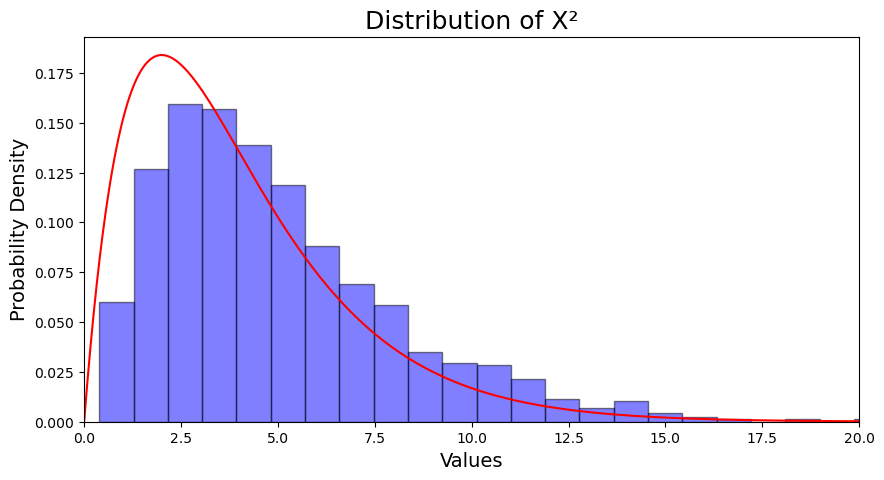

In [6]:
plt.figure(figsize=(10, 5))

df = 4
x = np.linspace(0, 20, 1000)
pdf_chi2 = chi2.pdf(x, df)

plt.figure(figsize=(10, 5))
plt.hist(chi, density=True, bins=30, alpha=0.5, color='blue', edgecolor="black", label='Dados Observados') 
plt.plot(x, pdf_chi2, color='red', linestyle='-', label=f'Chi-quadrado (df={df})') 
plt.title('Distribution of X²', fontsize = 18)
plt.xlim(0, 20)
plt.xlabel('Values', fontsize = 14)
plt.ylabel('Probability Density', fontsize = 14)

plt.show()

Pearson discovered that the distribution of X² was approximately the same for any model. It is a universal distribution and a metric to measure deviations of the observed data in relation to any theoretical model.

To be more rigorous, the distribution of X² is not exactly a chi-square distribution, but it approximates a chi-square distribution when the sample size is large.

The chi-square depends on a parameter, called degrees of freedom, as showed in the variable "df" above. It is equal the number of categories minus 1 minus p, where p is the number of parameteres we had to estimate. Therefore, 6-1-1=4.

The tipical values usually are those located between 0 and 10. So we have to compare the obtained X² to a chi-square with a certain degrees of freedom. To do this, we use the p-value, which is a way of expressing how discrepant the observed X² is. A p-value near zero is a evidence that the model didn't fit well to the data.

## Number of sons

In his classic book Statistical Methods for Research Workers, Ronald A. Fisher, the greatest statistical genius who ever lived, analyzes some data concerning the number of male children among families with a total of 8 children. The data was collected by A. Geissler in a region of Germany from 1876 to 1885. Fisher's book has a page on Wikipedia at http://en.wikipedia.org/wiki/Statistical_Methods_for_Research_Workers.

It is well known that male births are slightly more numerous than female births. Suppose the probability of a child being male is θ > 0.5. Assume that the 8 successive births in a family of size 8 are independent. Also assume that θ is the same for all families and for the 8 births within a family sequence. Then the number X of boys in a family of size 8 follows a binomial distribution: X ∼ Bin(8, θ).

The OBS line in the follwoing table shows the number of families with k male children in a population of 53,680 families each with exactly 8 children. The ESP line shows the expected number of families with k boys out of the 8 children if the binomial model applies.

It is impressive that several hundred families had all their 8 children as either boys or all girls. Did these hundreds of families represent an excess compared to what is expected under the binomial model? If families differed not only due to chance associated with the binomial distribution, but also due to a tendency for some parents to produce boys or girls, the data would not fit well with a binomial distribution. Imagine, for a very extreme example, if each family chose a value θ for their probability of having boys. After choosing "their" θ, or their "coin", each family would toss it 8 times according to the binomial model. Suppose families drew their θ's from an urn where there were only two types of values in equal proportions: θ = 0.01 and θ = 0.99. In this case, we would see in the data an accumulation of families in extreme categories (with 0 or 1 boys, or 8 or 7 boys), with fewer families having an intermediate number of male children.

Of course, we do not see anything so extreme in the above data. Fisher writes: "The observed series differs from expectation markedly in two respects: one is the excess of unequally divided families; the other is the irregularity of the central values, showing an apparent bias in favour of even values. No biological reason is suggested for the latter discrepancy, which therefore detracts from the value of the data. The excess of the extreme types of family may be treated in more detail by comparing the observed with the expected ..."

In [7]:
OBS = np.array([215, 1485, 5331, 10649, 14959, 11929, 6678, 2092, 342])
ESP = np.array([165.22, 1401.69, 5202.65, 11034.65, 14627.60, 12409.87, 6580.24, 1993.78, 264.30])
DIF = OBS - ESP

In [8]:
data = {'k': [0, 1, 2, 3, 4, 5, 6, 7, 8],
        'OBS': OBS,
        'ESP': ESP,
        'DIF': DIF}

df = pd.DataFrame(data)
df

,k,OBS,ESP,DIF
0,0,215,165.22,49.78
1,1,1485,1401.69,83.31
2,2,5331,5202.65,128.35
3,3,10649,11034.65,-385.65
4,4,14959,14627.60,331.40
5,5,11929,12409.87,-480.87
6,6,6678,6580.24,97.76
7,7,2092,1993.78,98.22
8,8,342,264.30,77.70


Firstly, in order to verify our compreenshion of the problem, let's obtain the expected values of the table. Before doing this, we have to estimate the probability of man's birth from the data:

In [9]:
total = np.sum(OBS)
total

53680

In [10]:
prob = 0
for i in range(len(OBS)):
    
    prob+= i*OBS[i]/8
prob = prob/total

print('Probability = ', prob)

Probability =  0.5146772540983606


In [11]:
def expected_values(n, p):
    expected = np.zeros(9)
    
    for k in range(n+1):
        expected[k] = round((comb(n, k) * (p ** k) * ((1 - p) ** (n-k)))*53680, 2)
    
    return expected

In [12]:
expected_values(8, prob)

array([  165.22,  1401.69,  5202.65, 11034.65, 14627.6 , 12409.87,
        6580.24,  1993.78,   264.3 ])

Now, let's calcultate the chi-square statistic:

In [13]:
x2 = np.sum((OBS - ESP)**2 / ESP)

print(f"X² = {x2:.2f}")

X² = 91.87


The reference distribution for the chi-square statistic in this problem is the chi-square distribution with 7 degrees of freedom, which corresponds to the number of categories minus 1 minus the number of estimated parameters (9 - 1 - 1 = 7). The associated p-value is:

In [14]:
p_value = 1 - chi2.cdf(x2, 7)
print("p-value:", p_value)

p-value: 0.0


This is evidence that the data does not follow a binomial distribution with the estimated parameter

## Counting fungi

Again, in the same book, Ronald A. Fisher presents some data on counts of beer yeast (fungi) obtained through human observation using a microscope (hemocytometer). An area of 1 square millimeter was divided into 400 equally sized squares, and the number of fungi in each square was counted. The following table shows how many squares had k fungi. It also shows the expected numbers according to a Poisson model.

In [15]:
OBS =  [0, 20, 43, 53, 86, 70, 54, 37, 18, 10, 5, 2, 2, 0, 0, 0, 0]
ESP = [3.71, 17.37, 40.65, 63.41, 74.19, 69.44, 54.16, 36.21, 21.18, 11.02, 5.16, 2.19, 0.86, 0.31, 0.10, 0.03, 0.03]

In [16]:
data = {'k': list(range(0, 17)) + ['Total'],
        'OBS': OBS + [400],
        'ESP': ESP + [400]}

df = pd.DataFrame(data)
df.set_index('k', inplace=True)
df

,OBS,ESP
k,,
0,0,3.71
1,20,17.37
2,43,40.65
3,53,63.41
4,86,74.19
5,70,69.44
6,54,54.16
7,37,36.21
8,18,21.18


Let's estimate the mean from the data:

In [17]:
mean = sum([OBS[i]*i for i in range(len(OBS))])/sum(OBS)
print(mean)

4.68


To practice a little more, let's generate the expected poisson with this estimated parameter. (I think there is a typo in the last row of the column)

In [18]:
expected_poisson = [poisson.pmf(i, mean)*sum(OBS) for i in range(len(OBS))]
print(expected_poisson)

[3.7116055548258977, 17.3703139965852, 40.64653475200936, 63.40859421313459, 74.18805522936746, 69.44001969468796, 54.16321536185659, 36.2119782704984, 21.184007288241553, 11.01568378988562, 5.155340013666463, 2.193362842178095, 0.8554115084494589, 0.3079481430418053, 0.10294266495968882, 0.03211811146742289, 0.009394547604221192]


Did the data come from a Poisson(4.68)?

In [19]:
x2 = np.sum((np.array(OBS) - np.array(expected_poisson))**2 / np.array(expected_poisson))

print(f"X² = {x2:.2f}")

X² = 10.44


In [20]:
p_value = 1 - chi2.cdf(x2, 17-1-1)
p_value

0.7915062709073595

In [21]:
alpha = 0.05

if p_value < alpha:
    print("Reject the hypothesis")
else:
    print("Go ahead")

Go ahead


## Bombers in London

During the Second World War, the locations hit by bombs south of London were mapped. The area was divided into $ n = 576$ small squares, each with an area of $0.25$ km². The total number of bombs that hit the region was 537. Let $X_i$ represent the number of bombs in square $i$.

In [22]:
n = 576
total = 537

The following array gives the amount of squares with i bombs, where i is the index.

In [23]:
OBS = np.array([229, 211, 93, 35, 7, 1])

Let's assume that the bomb count plus 1 follow the logarithmic distribution with parameter θ ∈ (0, 1):

- $P(Y = k) = \frac{-1}{log(1 - \theta)} \cdot \frac{\theta^k}{k}   for k = 1, 2, ...$
- $E(Y) = \frac{-1}{log(1 - \theta)} \cdot \frac{\theta}{1 - \theta}$

In [24]:
x_mean = total / n
y_mean = x_mean + 1
print(y_mean)

1.9322916666666665


Let's solve E(Y) = 1.93229

In [25]:
from scipy.optimize import fsolve

def f(theta):
   
    if 1 - theta <= 0:
        return np.inf
    else:
        return -1 / np.log(1 - theta) * theta / (1 - theta) - 1.93229

In [26]:
theta_initial_guess = 0.5 
theta = fsolve(f, theta_initial_guess)[0]

if 0 < theta < 1:
    print("Approximate solution:", theta)
else:
    print("No valid solution found.")

Approximate solution: 0.6985081984130737


Now, we have to calculate the expected values

In [27]:
def log_prob(theta, k):
     return -1/(np.log(1-theta)) * ((theta**(k+1)/(k+1)))

In [28]:
results = [log_prob(theta, k) for k in range(5)]

remaining_prob = 1 - np.sum(results)
results.append(remaining_prob) 

EXP = np.array(results) * 576
print(EXP)

[335.56008573 117.19573547  54.57478803  28.59070265  15.97667216
  24.10201595]


Finally, the chi-square test:

In [29]:
x2 = np.sum((OBS - EXP)**2 / EXP)

print(f"X² = {x2:.2f}")

X² = 164.60


In [30]:
p_value = 1 - chi2.cdf(x2, 6 - 1 - 1)
print("p-value:", p_value)

p-value: 0.0


In [31]:
alpha = 0.05

if p_value < alpha:
    print("Reject the hypothesis")
else:
    print("Go ahead")

Reject the hypothesis


## Are the digits of π randomly uniform?

The first 608 digits of  the decimal expasion of $\pi$ have the follwoing frequencies:

In [32]:
observed_frequencies = np.array([60, 62, 67, 68, 64, 56, 62, 44, 58, 67])
mean = np.mean(observed_frequencies)
print(mean)

60.8


These data are compatible with the assumption that each digit is chosen completely random? That is, according to a discrete uniform distribution over the possible digits?

In [33]:
expected_frequencies = np.full(10, mean)
expected_frequencies

array([60.8, 60.8, 60.8, 60.8, 60.8, 60.8, 60.8, 60.8, 60.8, 60.8])

In [34]:
chi_2, p = chisquare(observed_frequencies, f_exp= expected_frequencies)

print("χ² =", chi_2)
print("p-value =", p)

χ² = 7.493421052631579
p-value = 0.5858880273157883


In [35]:
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, 9)

print("Critical value:", critical_value)

Critical value: 16.918977604620448


The value of χ² is less than the critical value of the chi-square distribution with 9 degrees of freedom for a significance level of 0.05, which is 16.919. Furthermore, the p-value is greater than 0.05. Therefore, we do not reject the null hypothesis that the distribution of the digits of π is uniform. We conclude that the data are compatible with the assumption that each digit is chosen completely at random.

## Testing web pages

The following code is a crawler that starts from the URL https://en.wikipedia.org/wiki/Ronald_Fisher, exploring links in a breadth-first manner. For each link, it stores the number of links present on the page and the size of the page's text. (I didn't run this code again recently, I just used the results.csv I got a long time ago!! So the code may crash)

In [36]:
import urllib3
from time import sleep

import requests
from bs4 import BeautifulSoup
from collections import deque
import os

In [37]:
def crawler(base_url, max_links = 100):

    dados_paginas = []
    links_visited = 0
    links_to_visit = deque([base_url])
    
    while links_to_visit and links_visited < max_links:
        
        url = links_to_visit.popleft()

        try:
            
            response = requests.get(url)
            
            if response.status_code == 200:
                soup = BeautifulSoup(response.text, "html.parser")

                # Count the numbers of link in the page
                num_links = len(soup.find_all("a"))

                # Save the content in a text file
                text = response.text

                dados_paginas.append({"URL": url, "num_links": num_links, "Tamanho_arquivo": len(text)})

                for link in soup.find_all("a"):
                    if link.has_attr("href"):
                        new_url = link["href"]
                        if new_url.startswith("http"):
                            links_to_visit.append(new_url)
                        else:
                            links_to_visit.append(f"{base_url}/{new_url}")

                links_visited += 1

        except:
            pass

    return dados_paginas

In [ ]:
data = crawler( "https://en.wikipedia.org/wiki/Ronald_Fisher")

In [ ]:
df = pd.DataFrame(data)
df.to_csv('results.csv', index=False)

In [ ]:
pd.options.display.max_rows = None
df

### Is the num_links a Poisson?

In [3]:
data = pd.read_csv("results.csv")
data.head()

,URL,num_links,Tamanho_arquivo
0,https://en.wikipedia.org/wiki/Ronald_Fisher,2057,436085
1,https://donate.wikimedia.org/wiki/Special:Fund...,33,58609
2,https://ar.wikipedia.org/wiki/%D8%B1%D9%88%D9%...,668,231236
3,https://ast.wikipedia.org/wiki/Ronald_Fisher,567,163401
4,https://azb.wikipedia.org/wiki/%D8%B1%D8%A7%D9...,144,64673


In [4]:
num_links = data["num_links"].values
print(num_links)

[2057   33  668  567  144  138  130 1357  256  403  273  287  308  308
  123  558  384  554  957  220  481  308  505  151  393  348  188  127
  198  289  138  132  305  255  600  341  213  299  607  706  328  533
  247  555  795  129  195  347  154  434  806  295  144 1356  694   58
   58 2067   50  694  113  115   58   58   50   44  129   67   97  194
   93    0   83   97   46  485   93   57  154   78   13  155   30   81
  154   31   74  173  113  173  173    2   54  176  176   33   51    6
   30   30   30    0   31   71   36  226]


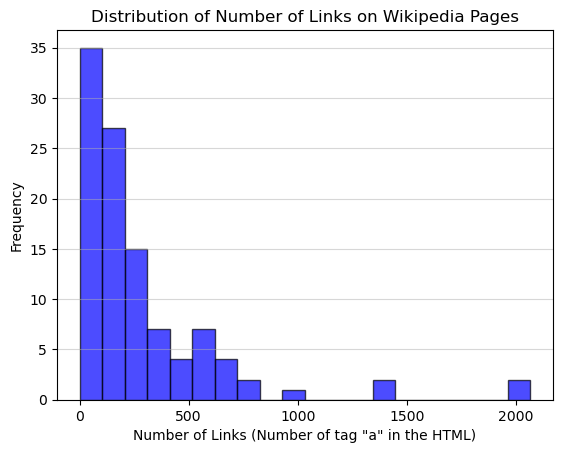

In [5]:
plt.hist(num_links, bins=20, color='blue', alpha=0.7, edgecolor='black')  
plt.title('Distribution of Number of Links on Wikipedia Pages')
plt.xlabel('Number of Links (Number of tag "a" in the HTML)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)  
plt.show()

Let's divide the observed links in five categories:

In [6]:
categories = [0,250,500,750,1000,1500]

In [14]:
OBS = []

for i in range(len(categories) - 1):
    lower_bound = categories[i]
    upper_bound = categories[i + 1]

    filtered_links = [link for link in num_links if lower_bound <= link < upper_bound]

    OBS.append(len(filtered_links))
    
OBS.append(len([link for link in num_links if link >= categories[-1]]))

In [15]:
OBS

[66, 21, 12, 3, 2, 2]

Now, let's generate the expected values

In [16]:
mean = num_links.mean()
print("Mean: ", mean)

Mean:  287.5566037735849


In [17]:
expected_poisson = poisson.pmf(np.arange(0,2000), mean)
expected_poisson

array([1.30543047e-125, 3.75385153e-123, 5.39722399e-121, ...,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000])

In [18]:
number_of_webpages = 105

In [23]:
EXP = []

for i in range(len(categories) - 1):
    lower_bound = categories[i]
    upper_bound = categories[i + 1]

    EXP.append(np.sum(expected_poisson[lower_bound:upper_bound])*number_of_webpages)
    
EXP.append(np.sum(expected_poisson[ categories[-1]:])*number_of_webpages)

In [24]:
EXP

[1.1664404523511374,
 103.8335595476556,
 6.042575157621365e-28,
 9.486789662099832e-112,
 2.527253365669127e-232,
 0.0]

In [31]:
x2 = np.sum((np.array(OBS) - np.array(EXP))**2 / np.array(EXP))

print(f"X² = {x2:.2f}")

X² = inf


/tmp/ipykernel_21653/3770439380.py:1: RuntimeWarning: divide by zero encountered in divide
  x2 = np.sum((np.array(OBS) - np.array(EXP))**2 / np.array(EXP))


Let's try to avoid the last category to avoido division by zero:

In [32]:
x2 = np.sum((np.array(OBS[:5]) - np.array(EXP[:5]))**2 / np.array(EXP[:5]))

print(f"X² = {x2:.2f}")

X² = 15827459384710094367520323877250526489315638065308624040088829311175472123806677216350425060333262572468678515223471652015543085421673086258174724092412752039303768821116026091419721055690935406741495548155961334941741372620442435584.00


I'm not sure, but it looks like the model isn't real!! Jokes aside, think about how the range of categories and the amount of data observed are related to this result.

### Is the lenght of the texts a Gaussian?

In [33]:
len_texts = data["Tamanho_arquivo"].values
print(len_texts)

[436085  58609 231236 163401  64673  71283  46430 458506 101574 130078
  84438  95223  92389  83156  47866 153297 126661 162704 236703  96343
 133286  96231 170405  56435  94987 124189  66961  45723  69790 114385
  49314  52786 115009  62205 173504  91153  98320 120069 129551 156899
 104863 156831  88957 138004 251963  52119  59812  89247  72800 118202
 258867  94235  54572 312467 508198  38262  38262 438138  32542 508198
  45762  51192  38346  38352  13662  45566  95024  74521 144032 256806
 107820 107785  65382  39078  53155 202383 105245  24481 360248 271608
  19452 361267  12544 276347 346435  12748 244561 185325  13769 185325
 185326 189970 126525 197678 184614  18898  41884   3269  12299  12341
  12249 255189  12428  46309  39185 241538]


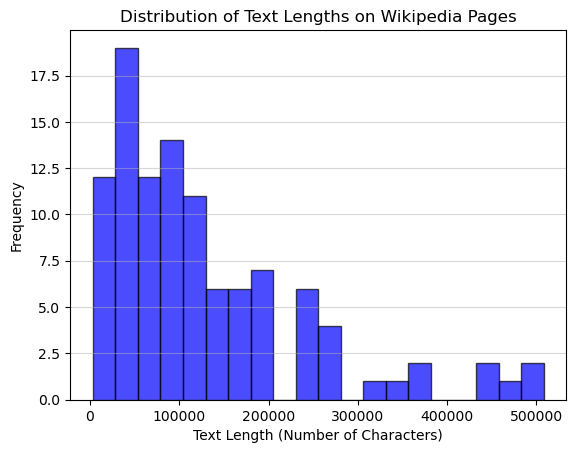

In [34]:
plt.hist(len_texts, bins=20, color='blue', alpha=0.7, edgecolor='black')  
plt.title('Distribution of Text Lengths on Wikipedia Pages')
plt.xlabel('Text Length (Number of Characters)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)  
plt.show()

Well, it doesn't look like a Gaussian at all, but you can test it for an exponential. Actually, I think is better to test the num_links for a exponential and the text lengths for a Poisson :)